In [47]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv("Expanded_data_with_more_features.csv")
df.head(3)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91


In [49]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [51]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

<h1>Drop Unnamed Column</h1>

In [52]:
df = df.drop("Unnamed: 0",axis = 1)

In [26]:
df.head(5)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


<h1>Gender Distribution</h1>

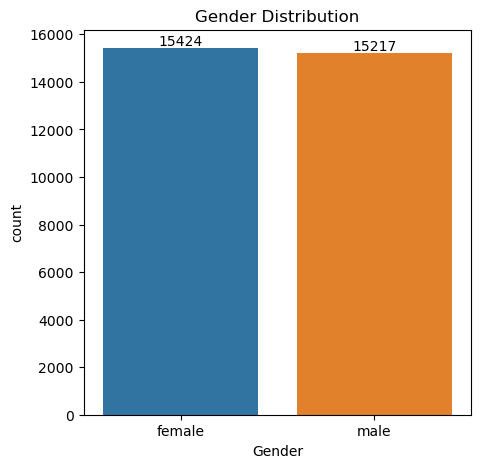

In [59]:
plt.figure(figsize=(5,5))
ax = sns.countplot(data=df,x="Gender")
ax.bar_label(ax.containers[0])
plt.title("Gender Distribution")
plt.show()

In [36]:
gb = df.groupby("ParentEduc").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
gb  

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


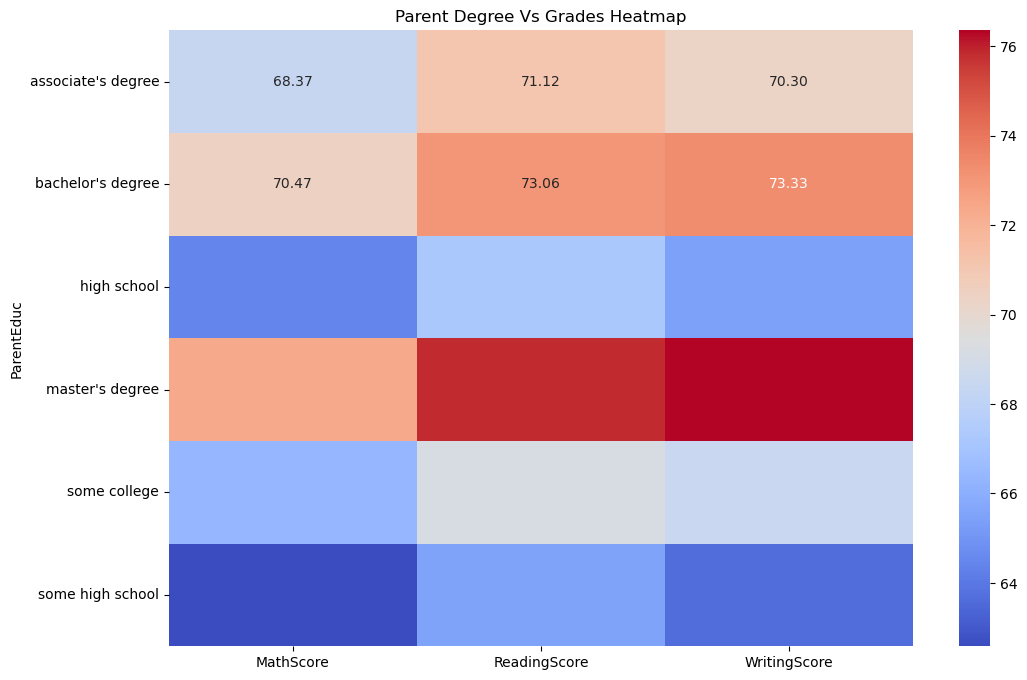

In [60]:
plt.figure(figsize=(12, 8))  # Increase figure size
sns.heatmap(gb, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Parent Degree Vs Grades Heatmap")
# plt.xticks(rotation=90, ha='right')
# plt.yticks(rotation=0)
plt.show()

In [56]:
gb1 = df.groupby("ParentMaritalStatus").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
gb1  

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


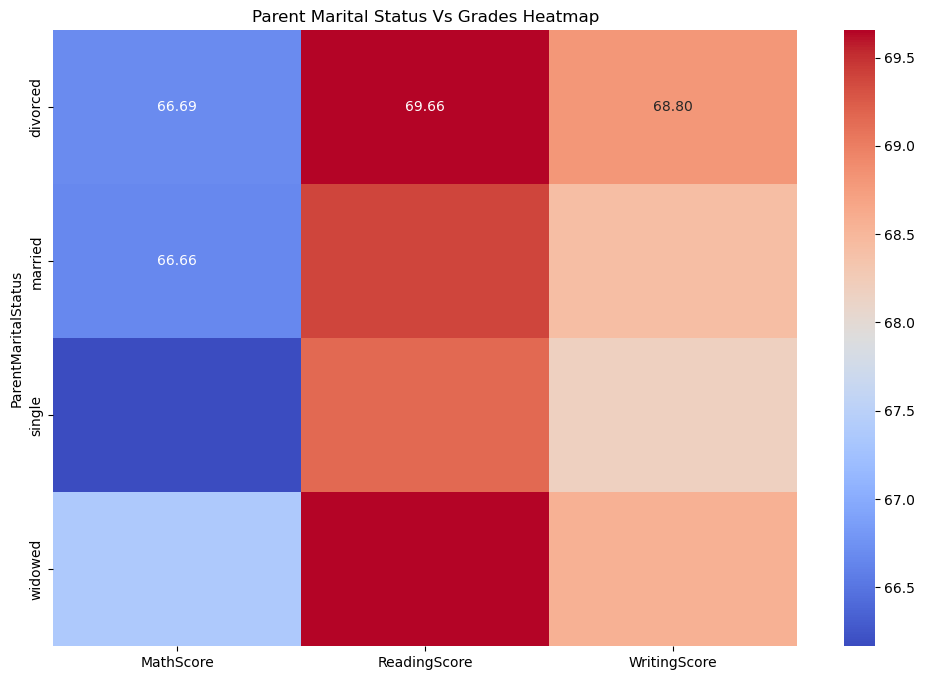

In [61]:
plt.figure(figsize=(12, 8))  # Increase figure size
sns.heatmap(gb1, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Parent Marital Status Vs Grades Heatmap")
# plt.xticks(rotation=90, ha='right')
# plt.yticks(rotation=0)
plt.show()

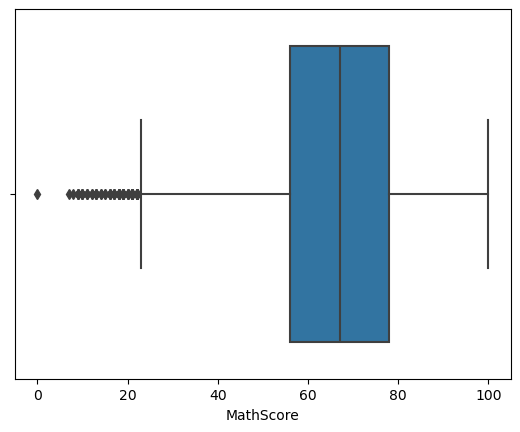

In [67]:
sns.boxplot(data=df,x = "MathScore")
plt.show()

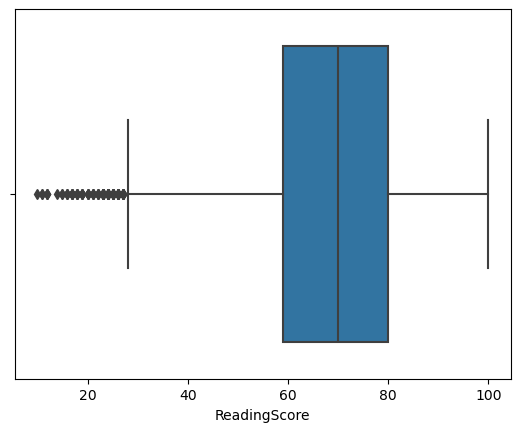

In [65]:
sns.boxplot(data=df,x = "ReadingScore")
plt.show()

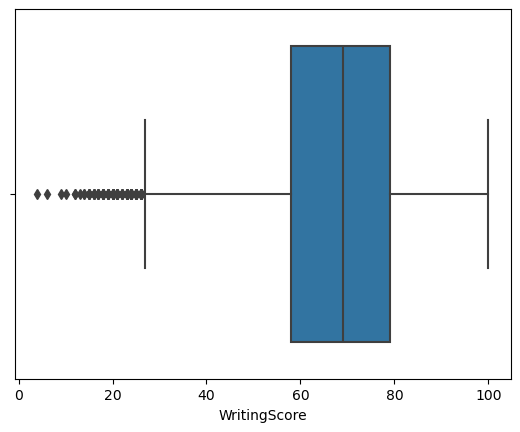

In [66]:
sns.boxplot(data=df,x = "WritingScore")
plt.show()

In [70]:
df["EthnicGroup"].unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

<h1>Distribution of Ethnic Groups</h1>

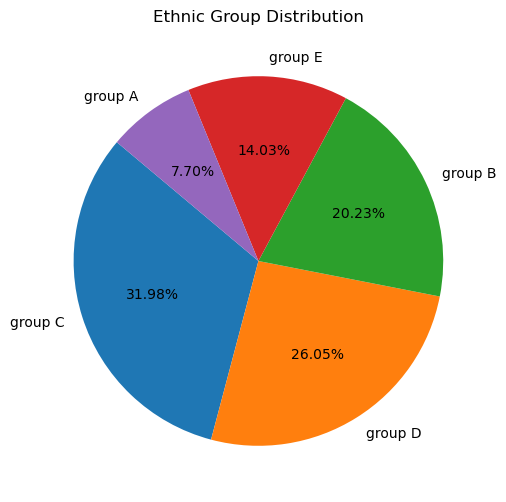

In [81]:
# Pie chart of ethnic group distribution
plt.figure(figsize=(8, 6))
ethnic_group_counts = df['EthnicGroup'].value_counts()
plt.pie(ethnic_group_counts, labels=ethnic_group_counts.index, autopct="%1.2f%%", startangle=140)
plt.title('Ethnic Group Distribution')
plt.show()

<h1>Descriptive Statistics by Gender</h1>

In [ ]:
descriptive_stats = df.groupby('Gender')[['MathScore', 'ReadingScore', 'WritingScore']].describe()
print("Descriptive Statistics by Gender:")
print(descriptive_stats)

Text(0.5, 1.0, 'Average Math Scores by Gender')

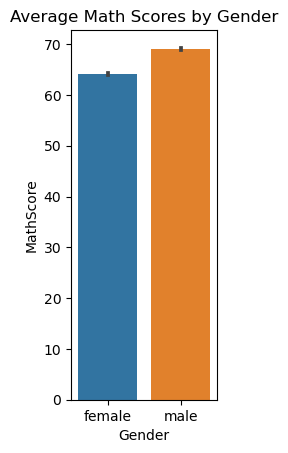

In [83]:
plt.subplot(1, 3, 1)
sns.barplot(x='Gender', y='MathScore', data=df)
plt.title('Average Math Scores by Gender')

Text(0.5, 1.0, 'Average Reading Scores by Gender')

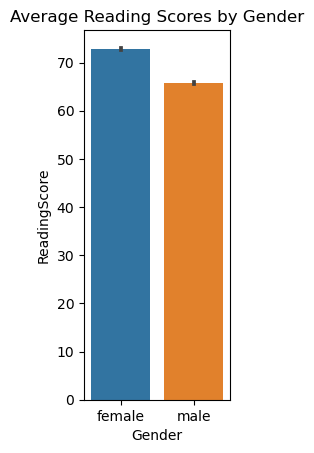

In [85]:
plt.subplot(1, 3, 1)
sns.barplot(x='Gender', y='ReadingScore', data=df)
plt.title('Average Reading Scores by Gender')

Text(0.5, 1.0, 'Average Writing Scores by Gender')

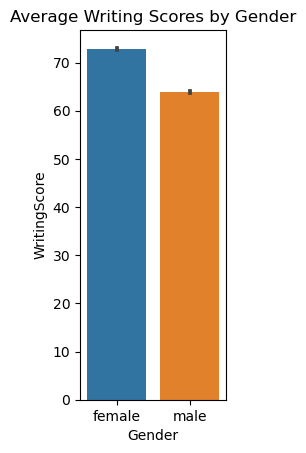

In [86]:
plt.subplot(1, 3, 1)
sns.barplot(x='Gender', y='WritingScore', data=df)
plt.title('Average Writing Scores by Gender')

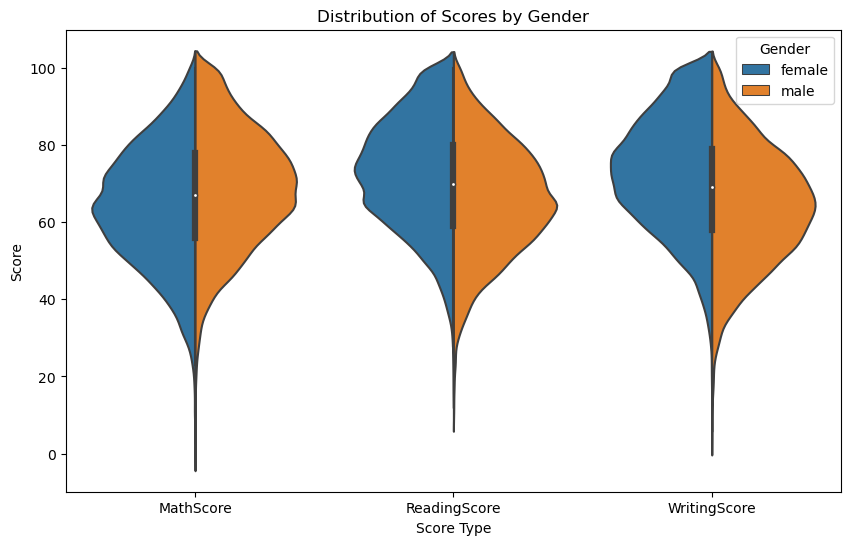

In [88]:
df_long = pd.melt(df, id_vars=['Gender'], value_vars=['MathScore', 'ReadingScore', 'WritingScore'], 
                  var_name='ScoreType', value_name='Score')

plt.figure(figsize=(10, 6))
sns.violinplot(x='ScoreType', y='Score', hue='Gender', data=df_long, split=True)
plt.title('Distribution of Scores by Gender')
plt.xlabel('Score Type')
plt.ylabel('Score')
plt.show()

In [89]:
avg_scores = df.groupby('IsFirstChild')[['MathScore', 'ReadingScore', 'WritingScore']].mean()
print("Average Scores by IsFirstChild:")
print(avg_scores)

Average Scores by IsFirstChild:
              MathScore  ReadingScore  WritingScore
IsFirstChild                                       
no            66.246832     69.132614     68.210887
yes           66.740646     69.542553     68.558484


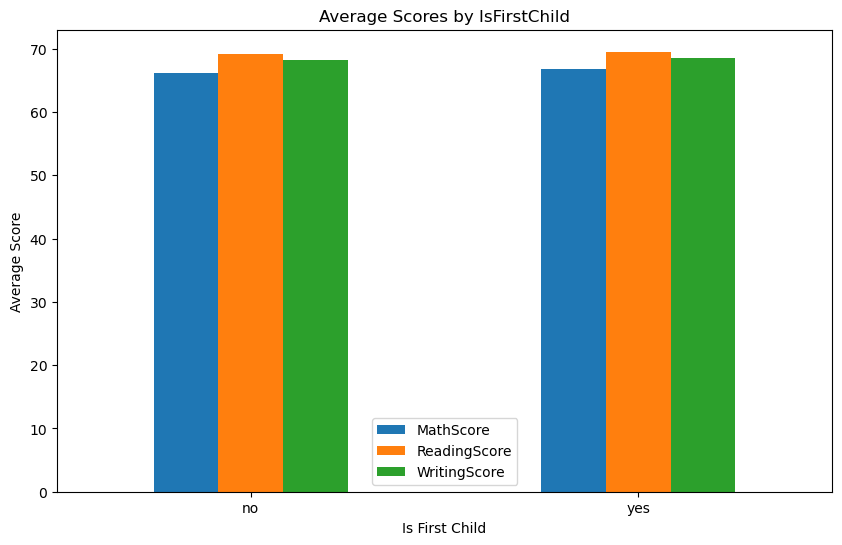

In [90]:
avg_scores.plot(kind='bar', figsize=(10, 6))
plt.title('Average Scores by IsFirstChild')
plt.xlabel('Is First Child')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.show()

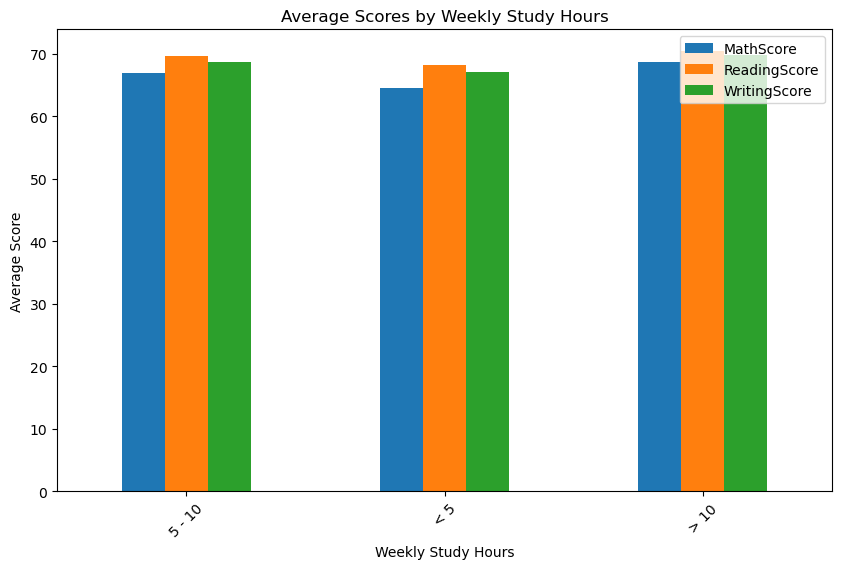

In [96]:
avg_scores = df.groupby('WklyStudyHours')[['MathScore', 'ReadingScore', 'WritingScore']].mean()

avg_scores.plot(kind='bar', figsize=(10, 6))
plt.title('Average Scores by Weekly Study Hours')
plt.xlabel('Weekly Study Hours')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()

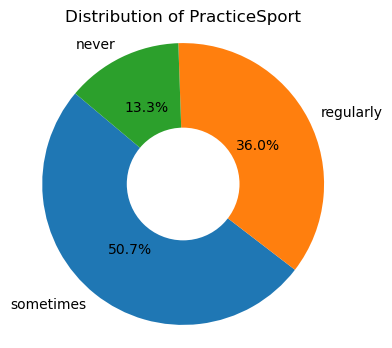

In [106]:
sport_distribution = df['PracticeSport'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(sport_distribution, labels=sport_distribution.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title('Distribution of PracticeSport')
plt.gca().add_artist(plt.Circle((0,0),0.40,fc='white'))
plt.axis('equal')
plt.show()

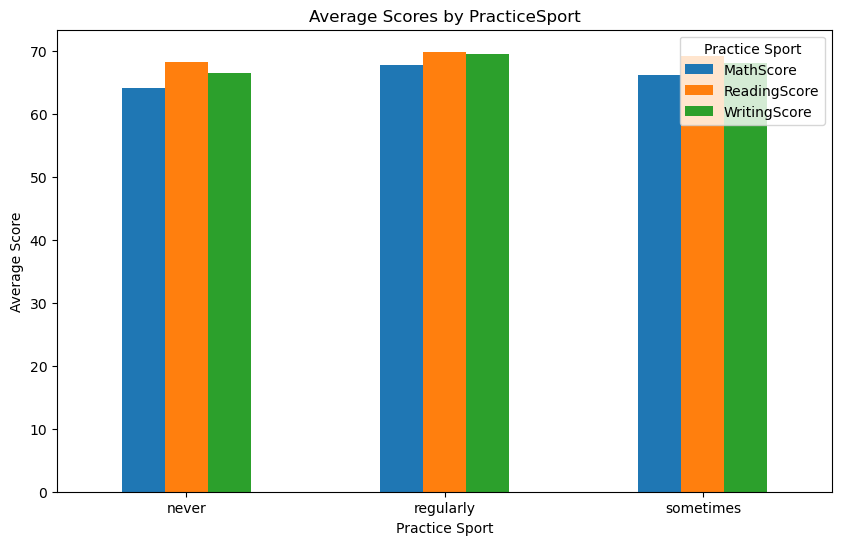

In [107]:
avg_scores_practice = df.groupby('PracticeSport')[['MathScore', 'ReadingScore', 'WritingScore']].mean()
avg_scores_practice.plot(kind='bar', figsize=(10, 6))
plt.title('Average Scores by PracticeSport')
plt.xlabel('Practice Sport')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.legend(title='Practice Sport')
plt.show()